# A minimal example
## Imports
Only `main` needs to be imported here. `methods_merge` is used to illustrate the merging method.

In [1]:
%matplotlib notebook
from cobubbles import main, methods_merge
from copy import deepcopy

## Create simulation and show parameters
Simulation `SimuB` is instantiated, with its default parameters. The `mean_lifetime` is overridden by the value given in argument.

In [2]:
params = dict(mean_lifetime=8)
s = main.SimuB(**params)
s.params_df.to_frame(name='Simulation parameters')

,Simulation parameters
steps,100
width,30
n_bubbles,1
rate_prod_avg,16
rate_prod_std,4
meniscus,1
code_version,0.1+1.g8084d37.dirty
class_name,cobubbles.main.SimuB
timestamp,2020-12-03 09:56:24.562088
mean_lifetime,8


## Run simulation and plot result
By default, simulation is run for `n = 100` iterations (as indicated in the `steps` parameters), or by the number of iterations in argument of `run()`.
Number of bubbles and mean diameter are plotted versus the iteration ("time").

<IPython.core.display.Javascript object>


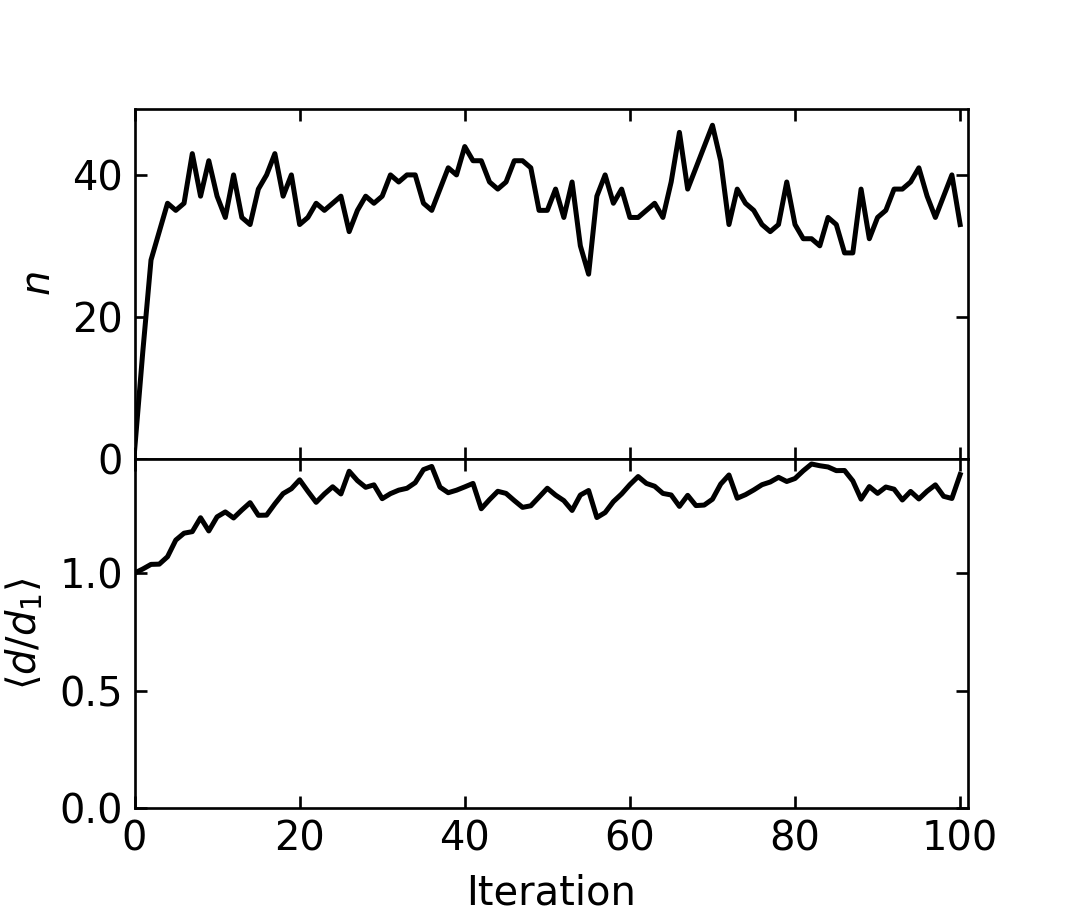

In [3]:
s.run()
s.plot_time_series()

## The merging step
3 illustrations of the merging random procedure, at three different iterations, before (gray transparent disks) and after (red circles) merging.

<IPython.core.display.Javascript object>


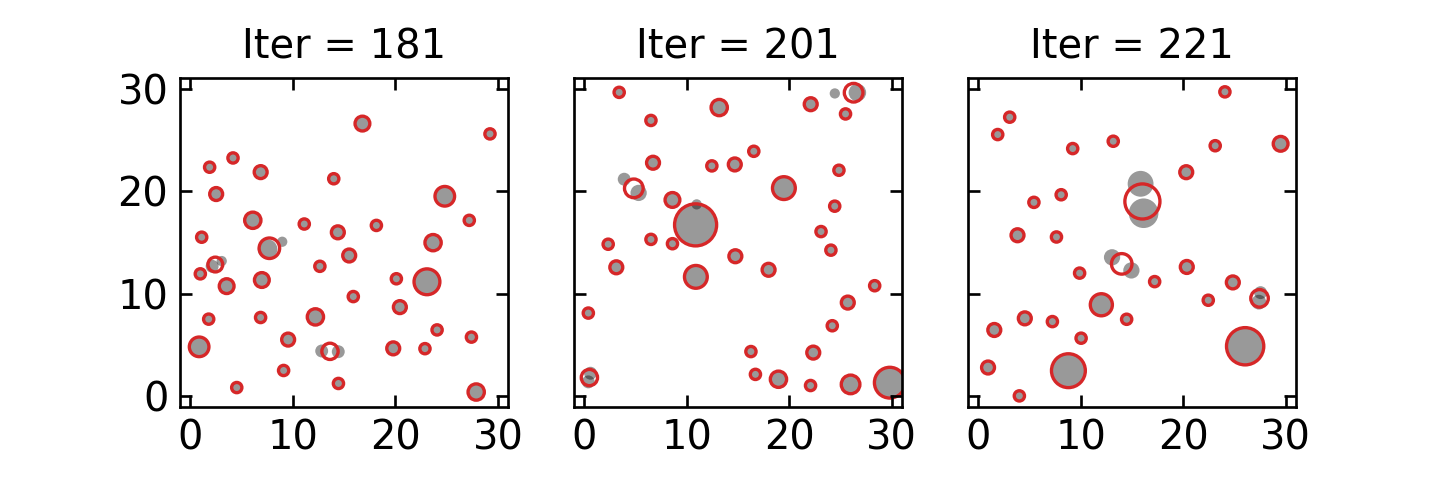

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(6, 2), sharex=True, sharey=True, tight_layout=False)
for ax in axs:
    s.run(20)
    bubbles = methods_merge.merge_bubbles_closest(
        [deepcopy(b) for b in s._bubbles], s.params['meniscus'], proba=1, show=ax)
    ax.set_xlim(-1, 31)
    ax.set_ylim(-1, 31)
    ax.set_title('Iter = {}'.format(len(s)), fontsize='medium')
    ax.set_xticks(10*np.arange(4))
    ax.set_yticks(10*np.arange(4))
    ax.set_aspect('equal')